### NAMA : ADI HERIANTO RAJAGUKGUK
### RAKAMIN STUDENT BATCH 22
### MINI PROJECT 3 : Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

## LOAD DATASET

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ignore warnings( not suggested for real-life projects)
import warnings
warnings.filterwarnings('ignore')

In [102]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/MINI PROJECT 3 - MARKETING CAMPAIGN/marketing_campaign_data.csv')
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# 1. TASK 1 

#### DESKRIPTIF STATISTIK

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

DATA UNDERSTANDING
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

- <b> Ada kolom yang memiliki data yang kosong ---> Kolom `Income`
- <b> Tipe data Dt_Customer tidak sesuai ---> perlu diganti dari object/str ke tipe datetime

In [105]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [106]:
print('Data yang duplikat = ', df.duplicated().sum())

Data yang duplikat =  0


<b> Tidak ada data yang duplikat

In [107]:
df.isna().sum().sort_values(ascending=False)

Income                 24
Unnamed: 0              0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
ID                      0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntCoke                 0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Year_Birth              0
Response                0
dtype: int64

Kolom `Income` memiliki 24 missing value

## 1. Melakukan Feature Engineering ----> FEATURE EXTRACTION

- Ubah tipe data `Dt_Customer` dari object/str ke tipe datetime
- Membuat kolom baru `Age` yang merupakan hasil pengurangan tahun 2022 (Tahun sekarang) dengan `Year Birth`
- Membuat kolom baru `Jumlah Anak` yang merupakan total penjumlahan `Kidhome` dan `Teenhome`
- Perlu juga untuk diketahui pada umur berapa customer join . 

In [108]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [109]:
df['Age'] = 2022 - df['Year_Birth']

In [110]:
df['Total_children'] = df['Kidhome'] + df['Teenhome']

In [111]:
df['Age_when_firs_joining'] = df['Dt_Customer'].dt.year - df['Year_Birth']

Dari Kolom `Age` yang telah diekstrak, akan diekstrak kembali pengelompokan berdasarkan umur. 
- Umur < 12 tahun = Child/Anak-anak
- umur 12-19 tahun = Teen
- umur 20-49 = Dewasa
- umur 50-60 = Middle Age and Mature

In [112]:
category_based_age = []
for i, kolom in df.iterrows():
  if kolom['Age'] <12 :
    segment = 'Child'
  elif kolom['Age'] >=12 and kolom['Age'] < 20:
    segment = 'Teens'
  elif kolom['Age'] >=20 and kolom['Age'] < 50:
    segment = 'Adult'
  else : 
    segment = 'Middle Age and Mature'
  category_based_age.append(segment)

In [113]:
df['segment_umur'] = category_based_age
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_children,Age_when_firs_joining,segment_umur
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,...,0,0,0,3,11,1,65,0,55,Middle Age and Mature
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,0,0,0,3,11,0,68,2,60,Middle Age and Mature
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,0,0,0,3,11,0,57,0,48,Middle Age and Mature
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,0,0,0,3,11,0,38,1,30,Adult
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,0,0,0,3,11,0,41,1,33,Adult


Total Spent/Jumlah pengeluaran dapat diekstrak dari penjumlahan kolom `MntCoke`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds` :

In [114]:
df['Total_spent'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

Total Accepted Campaign dapat diperoleh dari penjumlahan kolom: 
`Total_accept_campaign`,`AcceptedCmp1`, `AcceptedCmp2`,`AcceptedCmp3`, `AcceptedCmp4`, dan `AcceptedCmp5` :


In [115]:
df['Total_accepted_campaign'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

Total Transaksi diperoleh dari penjumlahan
`Total_transactions`+ `NumCatalogPurchases`+ `NumDealsPurchases` + `NumStorePurchases`+`NumWebPurchases` :

In [116]:
df['Total_transactions'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

<b> CONVERSION RATE ---> Berdasarkan jumlah kunjungan. Dalam hal ini, conversion rate bersifat sebagai fitur yang dapat diekstrak dari total transaksi dengan Jumlah kunjungan pada website platform kita. 

In [117]:
def func(x,y):
    if y == 0:
        return 0
    return x / y

In [118]:
# conversion rate
df['Conversion_rate'] = df.apply(lambda x: func(x['Total_transactions'],x['NumWebVisitsMonth']), axis=1)

In [119]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_Revenue,Response,Age,Total_children,Age_when_firs_joining,segment_umur,Total_spent,Total_accepted_campaign,Total_transactions,Conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,...,11,1,65,0,55,Middle Age and Mature,1617000,0,25,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,11,0,68,2,60,Middle Age and Mature,27000,0,6,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,11,0,57,0,48,Middle Age and Mature,776000,0,21,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,11,0,38,1,30,Adult,53000,0,8,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,11,0,41,1,33,Adult,422000,0,19,3.800000


In [120]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,5.597500e+02,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2.828250e+03,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1.959000e+03,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,3.530300e+07,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.000000e+00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.000000e+00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,2.400000e+01,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,2.375000e+04,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1.000000e+03,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,1.600000e+04,67000.0,232000.00,1725000.0


## 2. EXPLORATORY DATA ANALYSIS

In [121]:
df_eda = df.copy()

Separate numeric and categorical variables

- numeric_data = dataset.select_dtypes(include=[np.number])
- categorical_data = dataset.select_dtypes(exclude=[np.number])

OR 
- category = df.select_dtypes(include='object')
- numerical = df.select_dtypes(exclude='object')

In [122]:
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

In [123]:
nums = numerical.columns.to_list()
cats = category.columns.to_list()

In [124]:
print("Data numerik: ", nums)
print("Data category: ", cats)

Data numerik:  ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_children', 'Age_when_firs_joining', 'Total_spent', 'Total_accepted_campaign', 'Total_transactions', 'Conversion_rate']
Data category:  ['Education', 'Marital_Status', 'segment_umur']


#### A. DATA NUMERICAL

In [125]:
df[nums].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Age,Total_children,Age_when_firs_joining,Total_spent,Total_accepted_campaign,Total_transactions,Conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,3.0,11.0,0.149107,53.194196,0.950446,44.222321,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.0,0.0,0.356274,11.984069,0.751803,12.022855,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,3.0,11.0,0.000000,26.000000,0.000000,16.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.0,11.0,0.000000,45.000000,0.000000,36.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,3.0,11.0,0.000000,52.000000,1.000000,43.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,3.0,11.0,0.000000,63.000000,1.000000,54.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,3.0,11.0,1.000000,129.000000,3.000000,121.000000,2.525000e+06,4.000000,44.000000,43.000000


#### B. DATA CATEGORICAL

In [126]:
df[cats].describe()

,Education,Marital_Status,segment_umur
count,2240,2240,2240
unique,5,6,2
top,S1,Menikah,Middle Age and Mature
freq,1127,864,1319


Value Counting

In [127]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value count column Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value count column segment_umur:
Middle Age and Mature    1319
Adult                     921
Name: segment_umur, dtype: int64



### Univariate Analysis

In [128]:
df_eda_uni = df_eda.copy()

In [129]:
df_eda_uni.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Z_Revenue,Response,Age,Total_children,Age_when_firs_joining,segment_umur,Total_spent,Total_accepted_campaign,Total_transactions,Conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,...,11,1,65,0,55,Middle Age and Mature,1617000,0,25,3.571429
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,11,0,68,2,60,Middle Age and Mature,27000,0,6,1.200000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,11,0,57,0,48,Middle Age and Mature,776000,0,21,5.250000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,11,0,38,1,30,Adult,53000,0,8,1.333333
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,11,0,41,1,33,Adult,422000,0,19,3.800000


In [130]:
df_eda_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2240 non-null   int64         
 1   ID                       2240 non-null   int64         
 2   Year_Birth               2240 non-null   int64         
 3   Education                2240 non-null   object        
 4   Marital_Status           2240 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2240 non-null   int64         
 7   Teenhome                 2240 non-null   int64         
 8   Dt_Customer              2240 non-null   datetime64[ns]
 9   Recency                  2240 non-null   int64         
 10  MntCoke                  2240 non-null   int64         
 11  MntFruits                2240 non-null   int64         
 12  MntMeatProducts          2240 non-

In [131]:
df_eda_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2240 non-null   int64         
 1   ID                       2240 non-null   int64         
 2   Year_Birth               2240 non-null   int64         
 3   Education                2240 non-null   object        
 4   Marital_Status           2240 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2240 non-null   int64         
 7   Teenhome                 2240 non-null   int64         
 8   Dt_Customer              2240 non-null   datetime64[ns]
 9   Recency                  2240 non-null   int64         
 10  MntCoke                  2240 non-null   int64         
 11  MntFruits                2240 non-null   int64         
 12  MntMeatProducts          2240 non-

In [132]:
Data_numerik = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
                'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 
                'Total_children', 'Age_when_firs_joining', 'Total_spent', 'Total_accepted_campaign', 'Total_transactions', 'Conversion_rate']

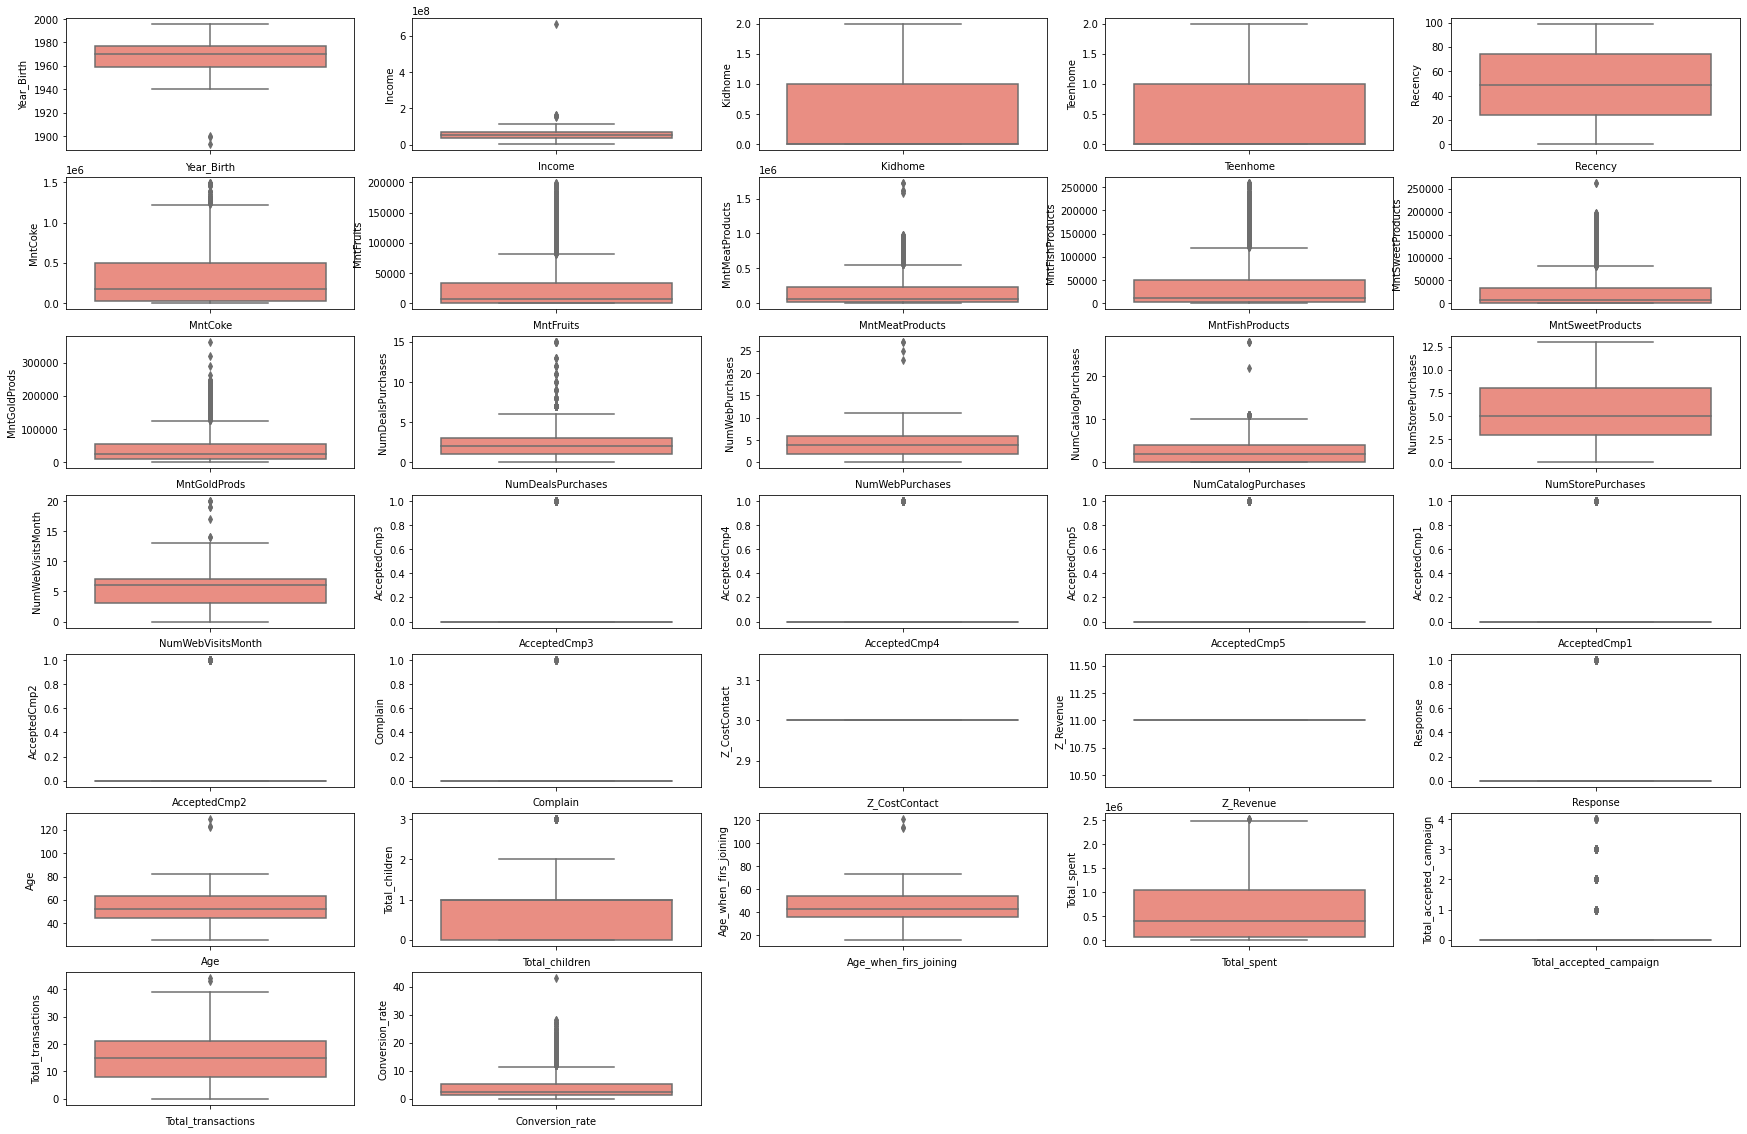

In [133]:
plt.figure(figsize=(30,20))
features = Data_numerik
for i in range(0, len(features)):
    plt.subplot(7, 5, i+1)
    sns.boxplot(y=df_eda_uni[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

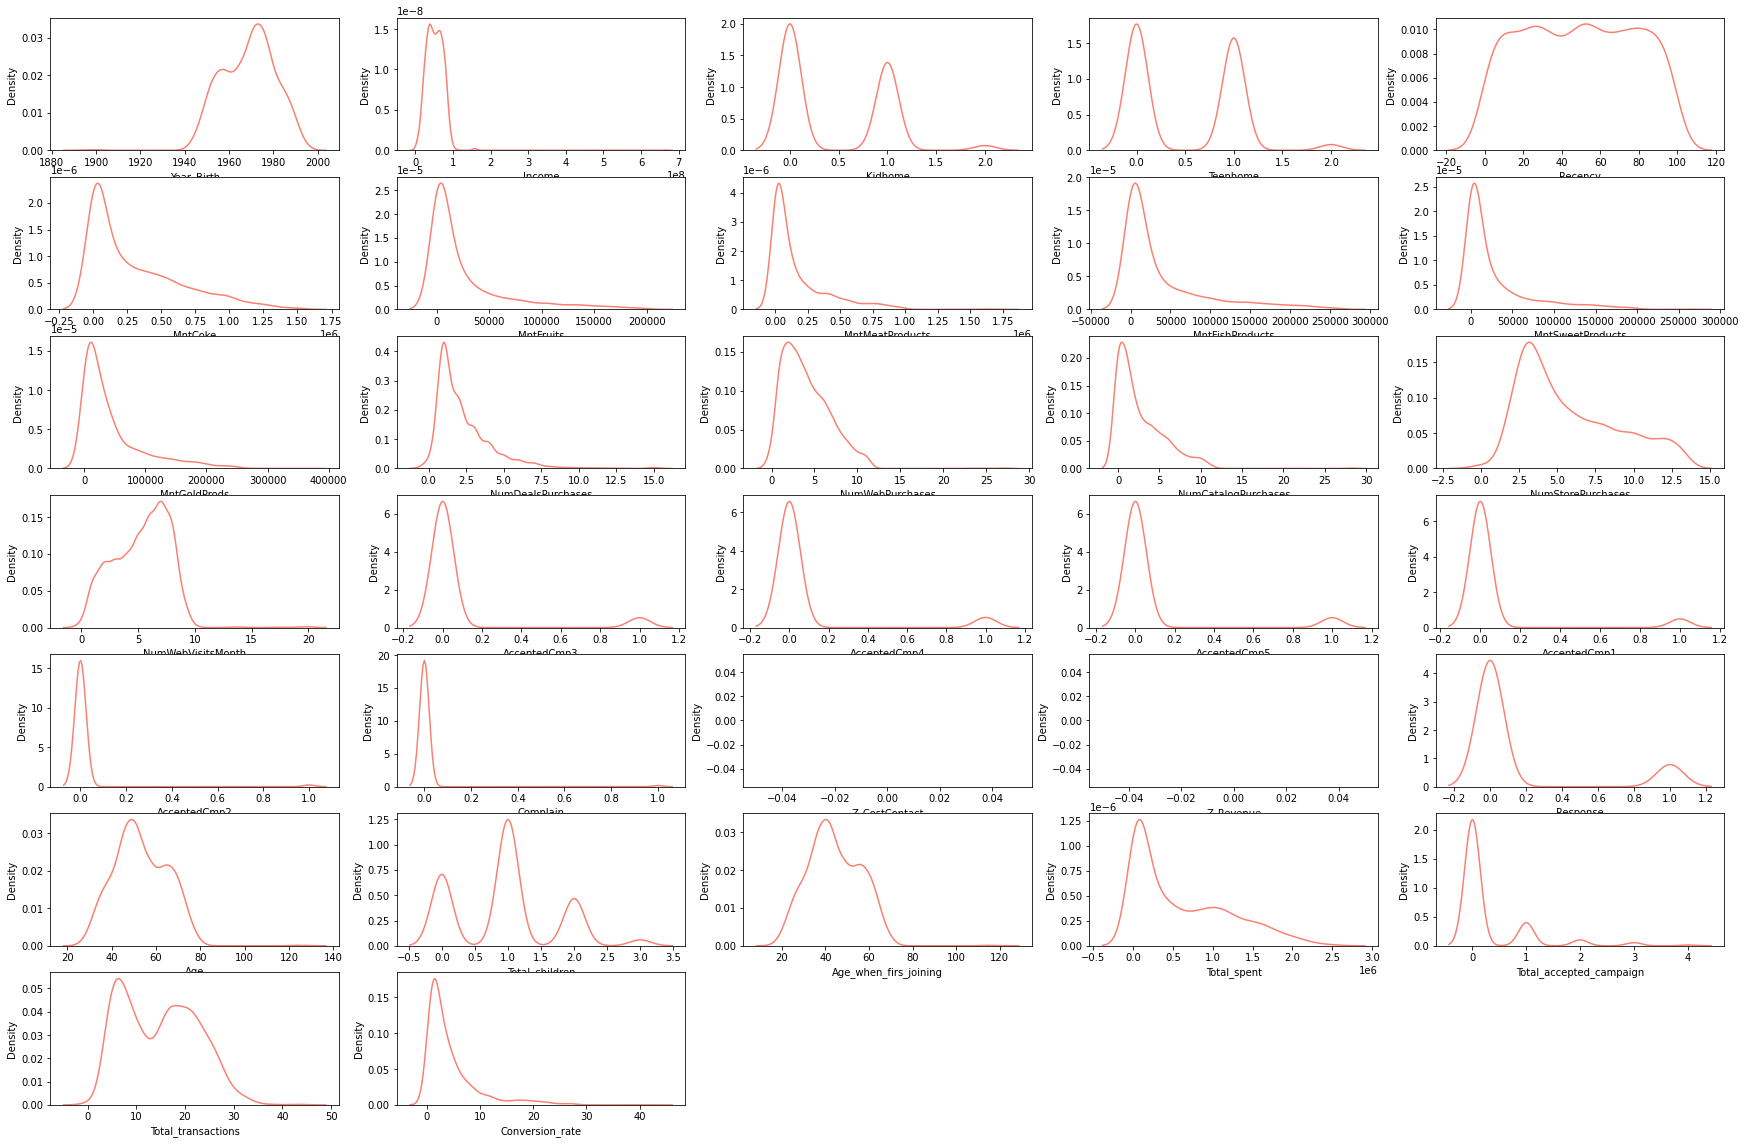

In [134]:
features = Data_numerik
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(7, 5, i+1)
    sns.kdeplot(x=df_eda[features[i]], color='salmon')
    plt.xlabel(features[i])

Beberapa sebaran data sudah ada yang termasuk dalam kategori distribusi normal. Sebaran data didominasi oleh sebaran data yang skew ke kanan. 

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2240 non-null   int64         
 1   ID                       2240 non-null   int64         
 2   Year_Birth               2240 non-null   int64         
 3   Education                2240 non-null   object        
 4   Marital_Status           2240 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2240 non-null   int64         
 7   Teenhome                 2240 non-null   int64         
 8   Dt_Customer              2240 non-null   datetime64[ns]
 9   Recency                  2240 non-null   int64         
 10  MntCoke                  2240 non-null   int64         
 11  MntFruits                2240 non-null   int64         
 12  MntMeatProducts          2240 non-

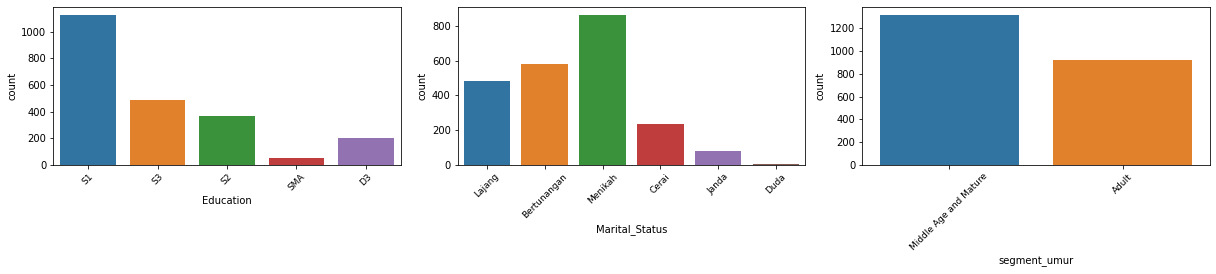

In [136]:
plt.figure(figsize=(17,10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], orient='v')
    plt.xticks(fontsize=9, rotation=45)
    plt.tight_layout()

### Multivariate Analysis

#### Correlation Heatmaps

In [137]:
df_eda_uni = df_eda_uni.drop(['Unnamed: 0', 'ID'], axis = 1)

In [138]:
df_eda_uni.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Age,Total_children,Age_when_firs_joining,Total_spent,Total_accepted_campaign,Total_transactions,Conversion_rate
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,NaN,NaN,0.021325,-1.000000,-0.090199,-0.998379,-0.111306,-0.000301,-0.168304,-0.093664
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,NaN,NaN,0.133047,0.161791,-0.293352,0.162557,0.667576,0.308381,0.566873,0.537596
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,NaN,NaN,-0.080008,-0.230176,0.689971,-0.226396,-0.556669,-0.211892,-0.477895,-0.445006
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,NaN,NaN,-0.154446,0.352111,0.698433,0.350505,-0.138384,-0.127759,0.133163,-0.197736
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,NaN,NaN,-0.198437,0.019871,0.018053,0.018322,0.020433,-0.012570,0.005740,0.000652
MntCoke,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,NaN,NaN,0.247254,0.157773,-0.351909,0.148484,0.891839,0.512358,0.712789,0.444492
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,NaN,NaN,0.125289,0.017917,-0.394853,0.014719,0.614229,0.161002,0.455461,0.482696
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,NaN,NaN,0.236335,0.030872,-0.502208,0.026077,0.842965,0.309313,0.554229,0.622016
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,NaN,NaN,0.111331,0.041625,-0.425503,0.037641,0.642818,0.177830,0.469454,0.511235
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,NaN,NaN,0.117372,0.018133,-0.383137,0.013897,0.603016,0.200237,0.472876,0.522915


Text(0.5, 1.0, 'Korelasi')

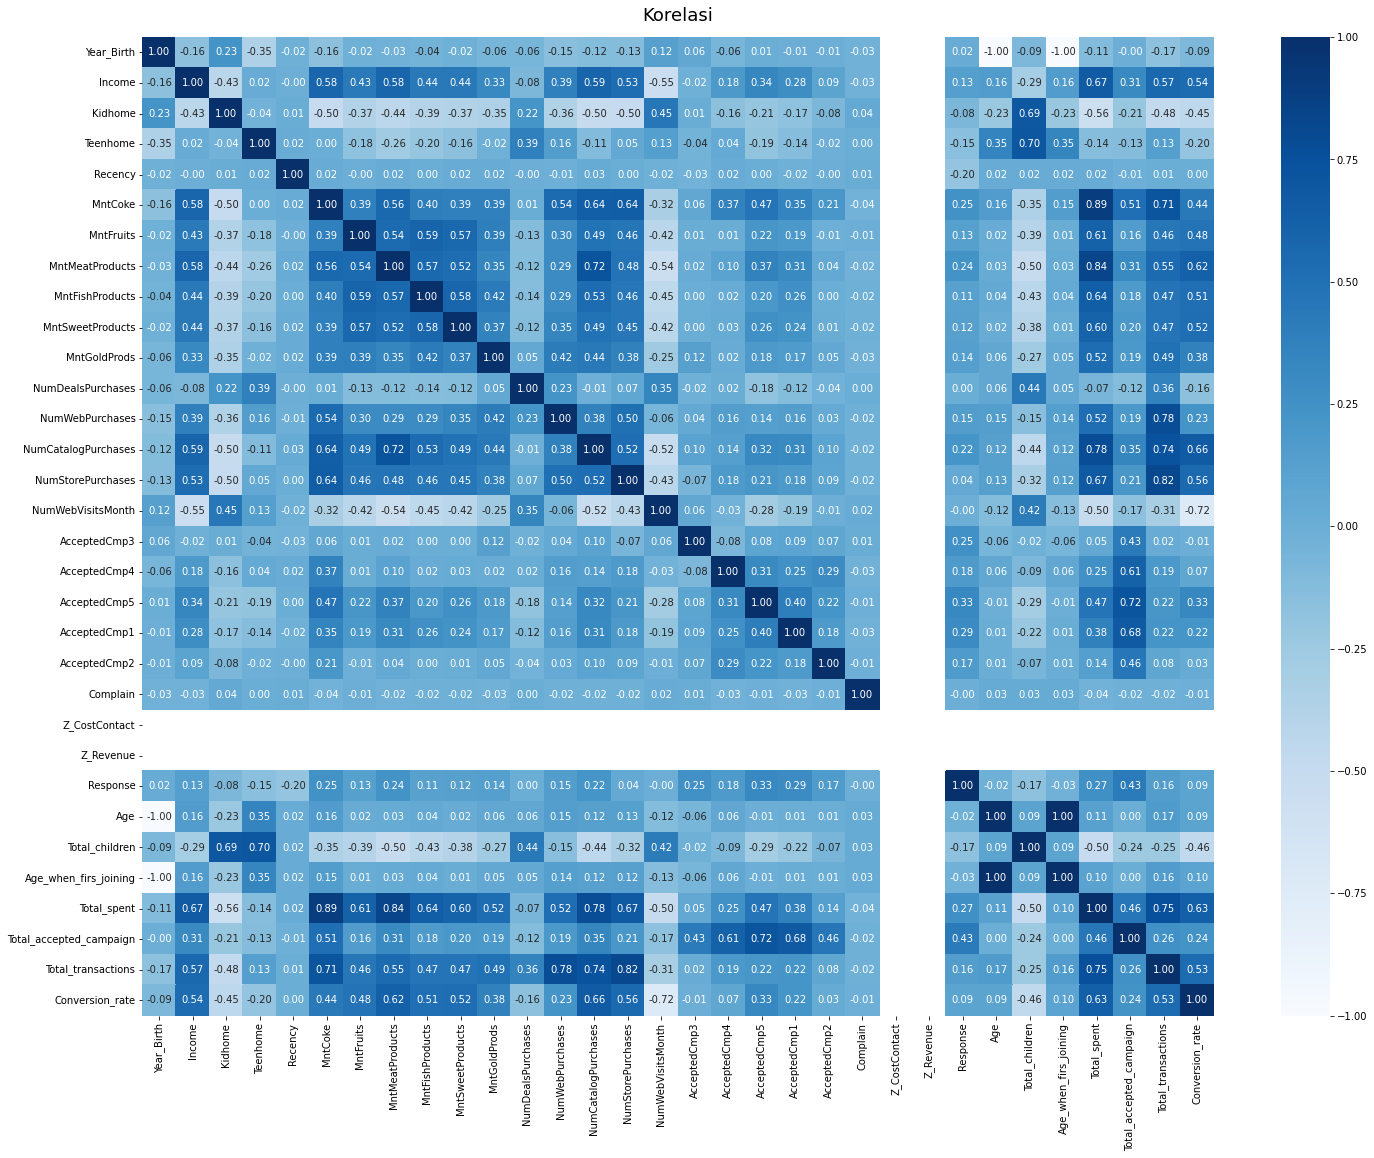

In [139]:
plt.figure(figsize = (24, 18))
heatmaps=sns.heatmap(df_eda_uni.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

Kita ingin melihat hubungan fitur Conversion_rate dengan fitur atau variabel lainnya. Jika dilihat dari tabel korelasi, dapat diperoleh beberapa data berikut : 
- `income` berkorelasi kuat positif dengan `Conversion_rate` --> 0.54
- `Total_transaction` berkorelasi positif kuat dengan `Conversion_rate` --> 0.53
- `Total_spent` berkorelasi positif kuat dengan `Conversion_rate` --> 0.63
- `Total_accept_campaign` berkorelasi positif kuat dengan `Conversion_rate`

- `Total_children` berkorelasi negatif kuat dengan `Conversion_rate`
- `NumWebVisitMonth` berkorelasi negatif kuat dengan `Conversion_rate`

Korelasi lainnya :     
- `income` dan `Total_transaction` memiliki korelasim positif  yang sangat kuat --> 0.59]
- `income` dan `Total_accepted_campaign` memiliki korelasi positif yang kuat --> 0.31
- `income` dan `total_spent` memiliki korelasi positif yang sangat kuat ---> 0.67
- `income` dan `total_children` memiliki korelasi negatf yang kuat --> -0.29


#### PAIR PLOT 

<Figure size 1800x1800 with 0 Axes>

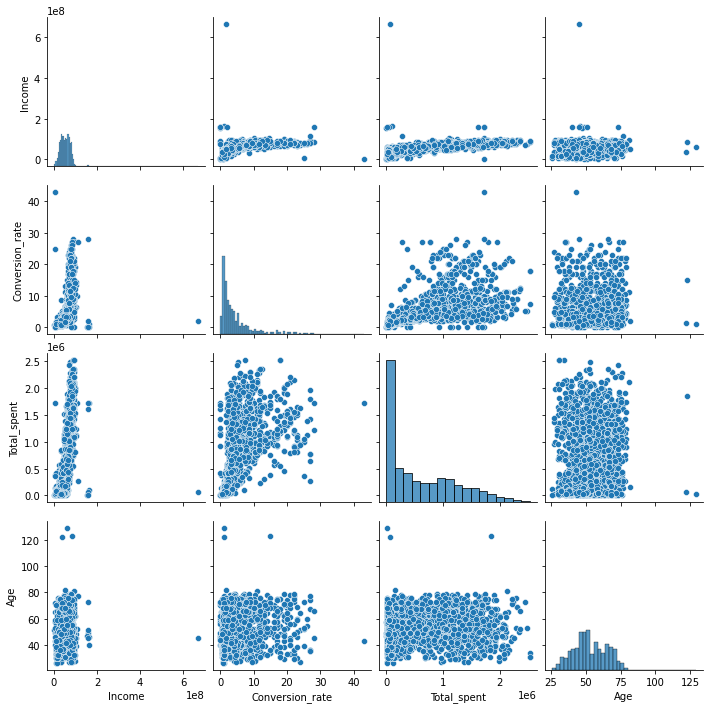

In [140]:
# di sini kita juga hanya menggunakan sample dari full dataset
plt.figure(figsize=(25, 25))
sns.pairplot(df_eda_uni[['Income', 'Conversion_rate', 'Total_spent', 'Age']])

HASIL PENGAMATAN 

### Categorical columns VS Conversion Rate

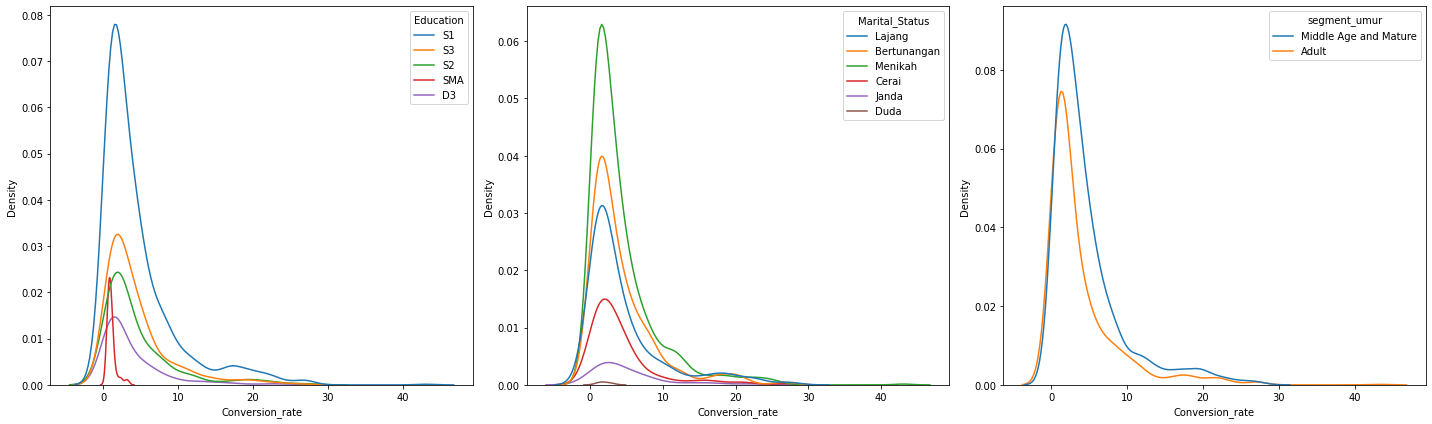

In [141]:
plt.figure(figsize = (20,6))
features = cats
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1) 
    sns.kdeplot(data=df_eda_uni, x='Conversion_rate', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()



Pengamatan :
- customer dengan tingkat pendidikan S1 cenderung memiliki conversion rate yang tinggi
- Customer dengan status 'menikah' juga cenderung memilki conversion rate yang tinggi, kemudian customer yang bertunangan dan lajang juga memiliki kecendrungan yangn tinggi. 
- Middle age dan mature serta adult merupakan kategori customer yang dibagi berdasarkan umur. Baik middle age, maupun adult, tidak dapat disimpulkan kecendrungan terhadap pengaruhnya pada conversion rate. 

### INSIGHT

#### 1. The Amount of Expenses on Each Needs / TOTAL COMPANY'S REVENUE FROM EACH SOLD PRODUCT

In [142]:
spent = [col for col in df if col.startswith('Mnt')]
spent

['MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [143]:
d= pd.DataFrame(df[spent].sum()).reset_index()
d = d.rename(columns = {'index' : 'needs',
                        0 : 'summary'})
d

,needs,summary
0,MntCoke,680816000
1,MntFruits,58917000
2,MntMeatProducts,373968000
3,MntFishProducts,84057000
4,MntSweetProducts,60621000
5,MntGoldProds,98609000


Text(0.5, 1.0, 'Jumlah Pendapatan Perusahaan Berdasarkan Produk Kebutuhan')

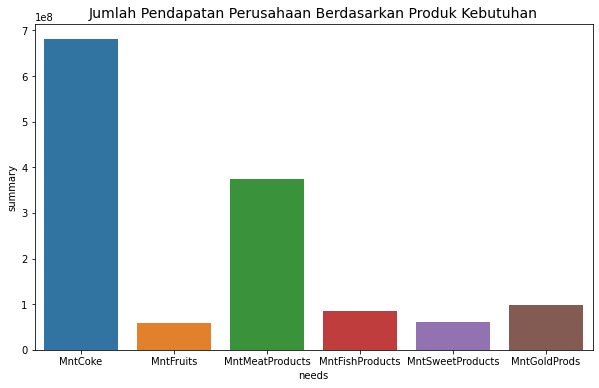

In [144]:
plt.figure(figsize = (10,6))
sns.barplot(x='needs', y='summary', data=d)
plt.title('Jumlah Pendapatan Perusahaan Berdasarkan Produk Kebutuhan', size = 14)

Jumlah pendapatan perusahaan pada produk cola adalah yang terbanyak dianatara produk lainnya dan pendapatan perusahaan pada produk buah dan produk manisan adalah yang paling kecil. Untuk kegiatan marketting campaign berikutnya, sebaiknya dilakukan campaign atau promosi pada dua produk ini, buah dan manisan, untuk meningkatkan penjualan dan pendapatan perusahaan melalui produk ini, harus ada keseimbangan pendapatan dari semua produk ini. Produk coke dan daging sebaiknya tidak perlu menjadi prioritas dalam marketting campaign kali ini. kita perlu usaha untuk meningkatkan pendapatan dari produk lain yang memberikan pendapatan yang kecil bagi perusaahaan. 

In [145]:
total_company_revenue = d['summary'].sum()

In [146]:
d['persentase(%)'] = d['summary']/total_company_revenue*100
d

,needs,summary,persentase(%)
0,MntCoke,680816000,50.171114
1,MntFruits,58917000,4.341748
2,MntMeatProducts,373968000,27.558681
3,MntFishProducts,84057000,6.194380
4,MntSweetProducts,60621000,4.467320
5,MntGoldProds,98609000,7.266755


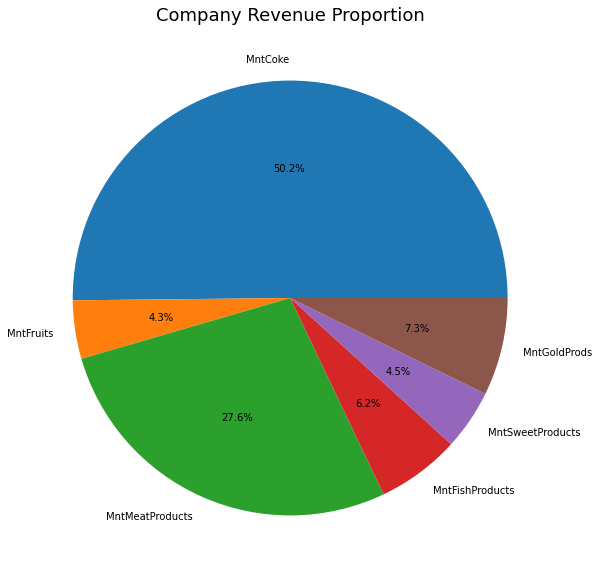

In [147]:
A=d['needs']
T=d['persentase(%)']
plt.figure(figsize = (14,10))  
plt.pie(T, labels=A,autopct= '%1.1f%%')
plt.title('Company Revenue Proportion', size = 18)
plt.show()

Proporsi pendapatan perusahaan pada produk coke adalah yang terbesar diantara produk lainnya, dan proporsi yang paling kecil adalah produk buah dan manisan. 

#### 2. Payment Methods Based on Marital Status

- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month

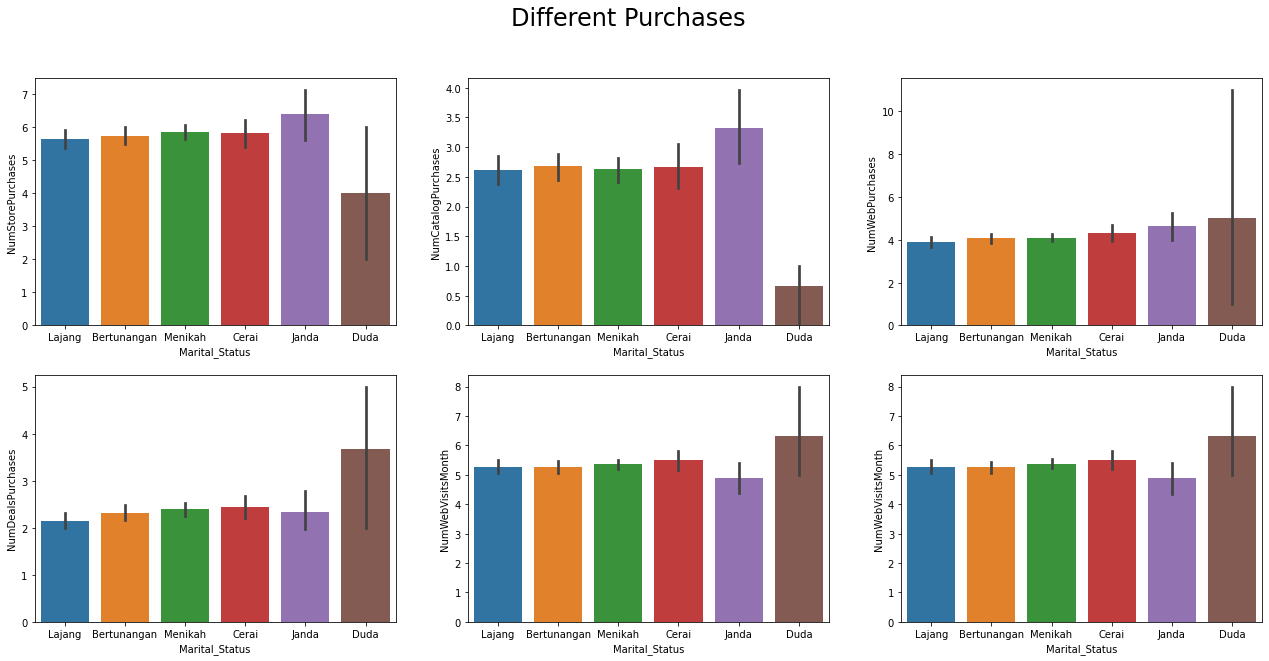

In [148]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3,figsize = (22,10))
fig.suptitle('Different Purchases', size = 24)
sns.barplot(ax = axes[0,0],x=df['Marital_Status'],y = df['NumStorePurchases'])
#axes[0].set_title()
sns.barplot(ax = axes[0,1],x=df['Marital_Status'],y = df['NumCatalogPurchases'])
sns.barplot(ax = axes[0,2],x=df['Marital_Status'],y = df['NumWebPurchases'])
sns.barplot(ax = axes[1,0],x=df['Marital_Status'],y = df['NumDealsPurchases'])
sns.barplot(ax = axes[1,1],x=df['Marital_Status'],y = df['NumWebVisitsMonth'])
sns.barplot(x=df['Marital_Status'],y = df['NumWebVisitsMonth'])

Secara keseluruhan, jumlah pembayaran yang dilakukan berdasarkan metode pembayaran yang telah disediakan sudah cukup merata. 

#### 3. Jumlah Customer yang Menerima Marketing Campaign untuk Setiap Marketing Campaign yang Pernah Diadakan

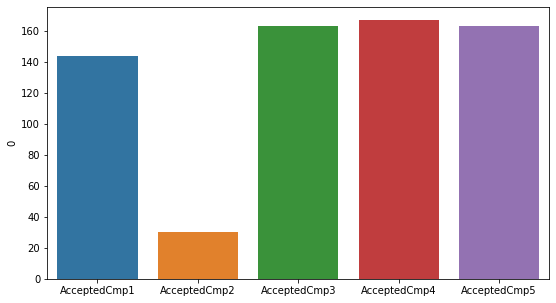

In [149]:
Cmp_tot = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].sum())
plt.figure(figsize=(9,5))
sns.barplot(x = Cmp_tot.index,y = Cmp_tot[0])

Jumlah customer yang menerima Marketing campaign menurun ketika dilakukan campaign kedua, akan tetapi naik lagi secara signifikan pada marketing campaign ketiga dan keempat, dan sedikit turun pada campaign ke 5. 

#### 4. Jumlah Customer yang Melakukan Pembayaran untuk Setiap Metode

In [150]:
total_purchase = [col for col in df if col.startswith('Num')]
df_TP = df[total_purchase].sum()
df_TP1  = pd.DataFrame(df_TP).reset_index()
df_TP1  =df_TP1.rename(columns = {'index' : 'needs',
                        0 : 'summary'})

In [151]:
df_TP_oke = df_TP1[~(df_TP1['needs'].str.contains('NumWebVisitsMonth'))]
df_TP_oke

,needs,summary
0,NumDealsPurchases,5208
1,NumWebPurchases,9150
2,NumCatalogPurchases,5963
3,NumStorePurchases,12970


Text(0.5, 1.0, 'Jumlah Customer yang Melakukan Pembayaran untuk Setiap Metod')

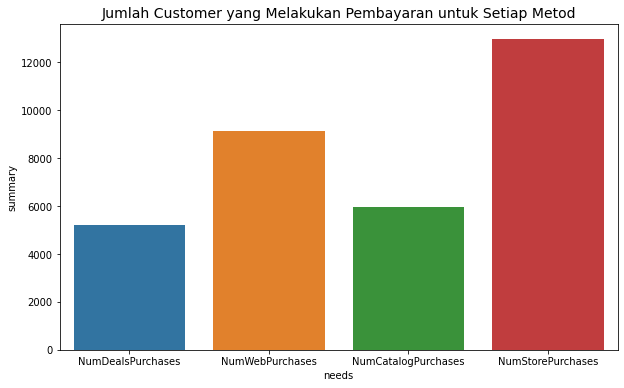

In [152]:
plt.figure(figsize = (10,6))
sns.barplot(x='needs', y='summary', data=df_TP_oke)
plt.title('Jumlah Customer yang Melakukan Pembayaran untuk Setiap Metod', size = 14)

Mayoritas dari customer melakukan pembayaran langsung di store. Perlu peningkatan kualitas website, baik dari segi user interface website dll untuk meningkatkan transaksi oleh customer di website kita.  Kita juga perlu meningkatkan inovasi untuk layanan e-catalog untuk mempermudah system pembayaran dengan catalog

# TASK 2 - DATA CLEANING

In [153]:
df_1 = df.copy()

### Cek missing value

In [154]:
df_1.isna().sum().sort_values(ascending=False)

Income                     24
Unnamed: 0                  0
Response                    0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Age                         0
NumWebVisitsMonth           0
Total_children              0
Age_when_firs_joining       0
segment_umur                0
Total_spent                 0
Total_accepted_campaign     0
Total_transactions          0
AcceptedCmp3                0
NumStorePurchases           0
ID                          0
NumCatalogPurchases         0
Year_Birth                  0
Education                   0
Marital_Status              0
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntCoke                     0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetPr

In [155]:
percentage_of_null_values = ((df_1.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

Income                     1.071429
Unnamed: 0                 0.000000
Response                   0.000000
AcceptedCmp4               0.000000
AcceptedCmp5               0.000000
AcceptedCmp1               0.000000
AcceptedCmp2               0.000000
Complain                   0.000000
Z_CostContact              0.000000
Z_Revenue                  0.000000
Age                        0.000000
NumWebVisitsMonth          0.000000
Total_children             0.000000
Age_when_firs_joining      0.000000
segment_umur               0.000000
Total_spent                0.000000
Total_accepted_campaign    0.000000
Total_transactions         0.000000
AcceptedCmp3               0.000000
NumStorePurchases          0.000000
ID                         0.000000
NumCatalogPurchases        0.000000
Year_Birth                 0.000000
Education                  0.000000
Marital_Status             0.000000
Kidhome                    0.000000
Teenhome                   0.000000
Dt_Customer                0

Karena missing value hanya 1% (toleransi dibawah 5%), maka data yang mengandung missing value tersebut dihapus saja. 

In [156]:
df_1.dropna(subset = ['Income'], inplace = True)

Cek ulang :

In [157]:
df_1.isna().sum().sort_values(ascending=False)

Unnamed: 0                 0
Z_Revenue                  0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Response                   0
ID                         0
Age                        0
Total_children             0
Age_when_firs_joining      0
segment_umur               0
Total_spent                0
Total_accepted_campaign    0
Total_transactions         0
NumWebVisitsMonth          0
NumStorePurchases          0
NumCatalogPurchases        0
NumWebPurchases            0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntCoke                    0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProduc

### Cek data yang duplikat

In [158]:
print('Data yang duplikat = ', df.duplicated().sum())

Data yang duplikat =  0


<b> Tidak ada data yang duplikat

### FEATURE SELECTION/ MEMBUAT DATA ATAU FITUR YANG TIDAK PERLU

In [159]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2216 non-null   int64         
 1   ID                       2216 non-null   int64         
 2   Year_Birth               2216 non-null   int64         
 3   Education                2216 non-null   object        
 4   Marital_Status           2216 non-null   object        
 5   Income                   2216 non-null   float64       
 6   Kidhome                  2216 non-null   int64         
 7   Teenhome                 2216 non-null   int64         
 8   Dt_Customer              2216 non-null   datetime64[ns]
 9   Recency                  2216 non-null   int64         
 10  MntCoke                  2216 non-null   int64         
 11  MntFruits                2216 non-null   int64         
 12  MntMeatProducts          2216 non-

In [160]:
df_2= df_1.drop(columns=['Unnamed: 0', 'ID', 'Recency', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

In [161]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2216 non-null   object 
 1   Marital_Status           2216 non-null   object 
 2   Income                   2216 non-null   float64
 3   Kidhome                  2216 non-null   int64  
 4   Teenhome                 2216 non-null   int64  
 5   MntCoke                  2216 non-null   int64  
 6   MntFruits                2216 non-null   int64  
 7   MntMeatProducts          2216 non-null   int64  
 8   MntFishProducts          2216 non-null   int64  
 9   MntSweetProducts         2216 non-null   int64  
 10  MntGoldProds             2216 non-null   int64  
 11  NumDealsPurchases        2216 non-null   int64  
 12  NumWebPurchases          2216 non-null   int64  
 13  NumCatalogPurchases      2216 non-null   int64  
 14  NumStorePurchases       

### FEATURE ENCODING

VALUE COUNTING 

In [162]:
for col in cats:
    print(f"Value count column {col}:")
    print(df_2[col].value_counts())
    print()

Value count column Education:
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64

Value count column Marital_Status:
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64

Value count column segment_umur:
Middle Age and Mature    1303
Adult                     913
Name: segment_umur, dtype: int64



<b>Strategi encoding
* `Education` \: label encoding
* `Marital_Status` dan  `segment_umur` \: One Hot Encoding 

In [163]:
# Mapping Education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df_2['Education'] = df_2['Education'].map(mapping_education)

In [164]:
for cat in ['Marital_Status', 'segment_umur']:
    onehots = pd.get_dummies(df_2[cat], prefix=cat)
    df_2 = df_2.join(onehots)

In [165]:
df_2[['Education']]

,Education
0,2
1,2
2,2
3,2
4,4
...,...
2235,2
2236,4
2237,2
2238,3


In [166]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Education                           2216 non-null   int64  
 1   Marital_Status                      2216 non-null   object 
 2   Income                              2216 non-null   float64
 3   Kidhome                             2216 non-null   int64  
 4   Teenhome                            2216 non-null   int64  
 5   MntCoke                             2216 non-null   int64  
 6   MntFruits                           2216 non-null   int64  
 7   MntMeatProducts                     2216 non-null   int64  
 8   MntFishProducts                     2216 non-null   int64  
 9   MntSweetProducts                    2216 non-null   int64  
 10  MntGoldProds                        2216 non-null   int64  
 11  NumDealsPurchases                   2216 no

### FEATURE TRANSFORMATION

In [167]:
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,2.459838e+00,1.004825e+00,0.0,2.000000e+00,2.000000e+00,3.0,4.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,3.530300e+07,5.138150e+07,68522000.0,666666000.0
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.000000e+00,0.000000e+00,1.0,2.0
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.000000e+00,0.000000e+00,1.0,2.0
MntCoke,2216.0,3.050916e+05,3.373279e+05,0.0,2.400000e+04,1.745000e+05,505000.0,1493000.0
MntFruits,2216.0,2.635605e+04,3.979392e+04,0.0,2.000000e+03,8.000000e+03,33000.0,199000.0
MntMeatProducts,2216.0,1.669959e+05,2.242833e+05,0.0,1.600000e+04,6.800000e+04,232250.0,1725000.0
MntFishProducts,2216.0,3.763764e+04,5.475208e+04,0.0,3.000000e+03,1.200000e+04,50000.0,259000.0
MntSweetProducts,2216.0,2.702888e+04,4.107205e+04,0.0,1.000000e+03,8.000000e+03,33000.0,262000.0
MntGoldProds,2216.0,4.396525e+04,5.181541e+04,0.0,9.000000e+03,2.450000e+04,56000.0,321000.0


Berdasarkan pengamatan : 
- `Kidhome`, `Teenhome`,  `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`, `Age`, `Income`, `Total_spent`, `Total_transactions`, `Total_accepted_campaign`, `MntCoke`, `MntFruit`, `MntMeatProducts`, `MntFishProducts`, `MntSweetproducts`, `MntGoldProducts`. perlu dilakukan standarisasi

In [168]:
from sklearn.preprocessing import  StandardScaler

# STANDARISASI
df_2['Total_children'] = StandardScaler().fit_transform(df_2['Total_children'].values.reshape(len(df_2), 1))
df_2['Age'] = StandardScaler().fit_transform(df_2['Age'].values.reshape(len(df_2), 1))
df_2['Total_accepted_campaign'] = StandardScaler().fit_transform(df_2['Total_accepted_campaign'].values.reshape(len(df_2), 1))
df_2['Kidhome'] = StandardScaler().fit_transform(df_2['Kidhome'].values.reshape(len(df_2), 1))
df_2['Teenhome'] = StandardScaler().fit_transform(df_2['Teenhome'].values.reshape(len(df_2), 1))
df_2['NumDealsPurchases'] = StandardScaler().fit_transform(df_2['NumDealsPurchases'].values.reshape(len(df_2), 1))
df_2['NumWebPurchases'] = StandardScaler().fit_transform(df_2['NumWebPurchases'].values.reshape(len(df_2), 1))
df_2['NumCatalogPurchases'] = StandardScaler().fit_transform(df_2['NumCatalogPurchases'].values.reshape(len(df_2), 1))
df_2['NumStorePurchases'] = StandardScaler().fit_transform(df_2['NumStorePurchases'].values.reshape(len(df_2), 1))
df_2['NumWebVisitsMonth'] = StandardScaler().fit_transform(df_2['NumWebVisitsMonth'].values.reshape(len(df_2), 1))
df_2['Income'] = StandardScaler().fit_transform(df_2['Income'].values.reshape(len(df_2), 1))
df_2['Total_spent'] = StandardScaler().fit_transform(df_2['Total_spent'].values.reshape(len(df_2), 1))
df_2['Total_transactions'] = StandardScaler().fit_transform(df_2['Total_transactions'].values.reshape(len(df_2), 1))
df_2['MntCoke'] = StandardScaler().fit_transform(df_2['MntCoke'].values.reshape(len(df_2), 1))
df_2['MntFruits'] = StandardScaler().fit_transform(df_2['MntFruits'].values.reshape(len(df_2), 1))
df_2['MntFishProducts'] = StandardScaler().fit_transform(df_2['MntFishProducts'].values.reshape(len(df_2), 1))
df_2['MntSweetProducts'] = StandardScaler().fit_transform(df_2['MntSweetProducts'].values.reshape(len(df_2), 1))
df_2['MntMeatProducts'] = StandardScaler().fit_transform(df_2['MntMeatProducts'].values.reshape(len(df_2), 1))
df_2['MntGoldProds'] = StandardScaler().fit_transform(df_2['MntGoldProds'].values.reshape(len(df_2), 1))
df_2['Conversion_rate'] = StandardScaler().fit_transform(df_2['Conversion_rate'].values.reshape(len(df_2), 1))


Mari kita cek kembali :

In [169]:
df_2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Total_transactions,Conversion_rate,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,segment_umur_Adult,segment_umur_Middle Age and Mature
0,2,Lajang,0.234063,-0.823039,-0.928972,0.978226,1.549429,1.690227,2.454568,1.484827,...,1.319446,-0.167630,0,0,0,0,1,0,0,1
1,2,Lajang,-0.234559,1.039938,0.909066,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-1.157987,-0.652811,0,0,0,0,1,0,0,1
2,2,Bertunangan,0.769478,-0.823039,-0.928972,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0.797881,0.175797,1,0,0,0,0,0,0,1
3,2,Bertunangan,-1.017239,1.039938,-0.928972,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.897205,-0.625532,1,0,0,0,0,0,1,0
4,4,Menikah,0.240221,1.039938,-0.928972,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.537099,-0.120865,0,0,0,0,0,1,1,0


# TASK 3 - MODELLING

In [170]:
df_3 = df_2.drop(columns=['Marital_Status', 'segment_umur', 'Age_when_firs_joining'])

In [171]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Education                           2216 non-null   int64  
 1   Income                              2216 non-null   float64
 2   Kidhome                             2216 non-null   float64
 3   Teenhome                            2216 non-null   float64
 4   MntCoke                             2216 non-null   float64
 5   MntFruits                           2216 non-null   float64
 6   MntMeatProducts                     2216 non-null   float64
 7   MntFishProducts                     2216 non-null   float64
 8   MntSweetProducts                    2216 non-null   float64
 9   MntGoldProds                        2216 non-null   float64
 10  NumDealsPurchases                   2216 non-null   float64
 11  NumWebPurchases                     2216 no

### Melihat jumlah cluster yang tepat dengan menggunakan elbow method

[34878.232845673396, 30540.058576388423, 28505.25463828881, 27124.66474181629, 26012.173058980225, 25054.08078510633, 24146.7182323081, 23557.05782509179, 23081.918239059763]


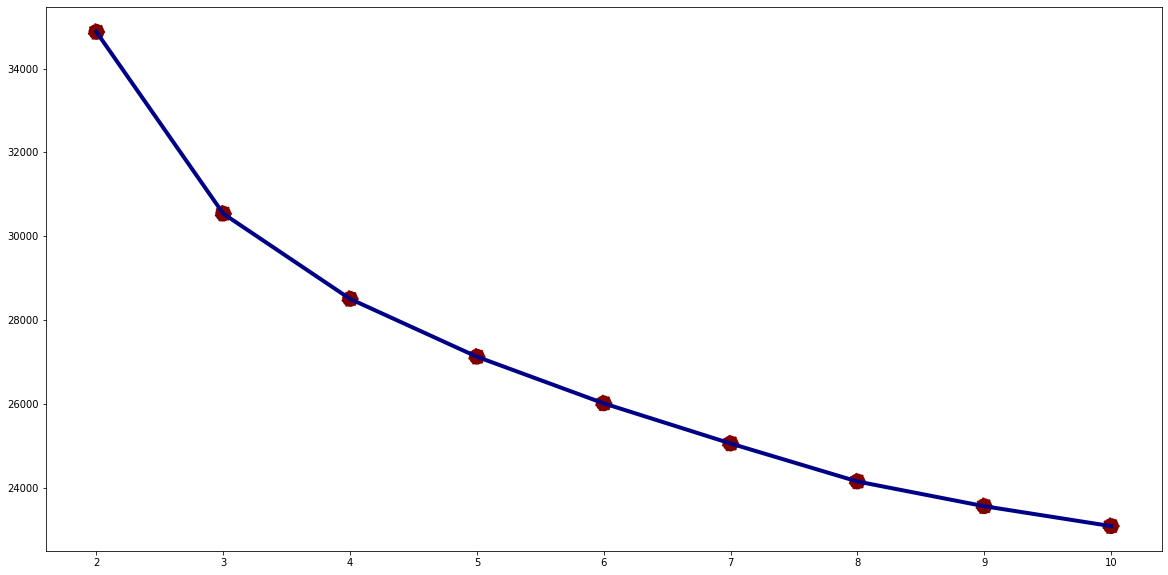

In [172]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_3.values)
    inertia.append(kmeans.inertia_)


print(inertia)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--');

### CLUSTERING DENGAN K MEANS MODEL

In [173]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_3.values)
df_3['cluster'] = kmeans.labels_
df_1['cluster'] = kmeans.labels_

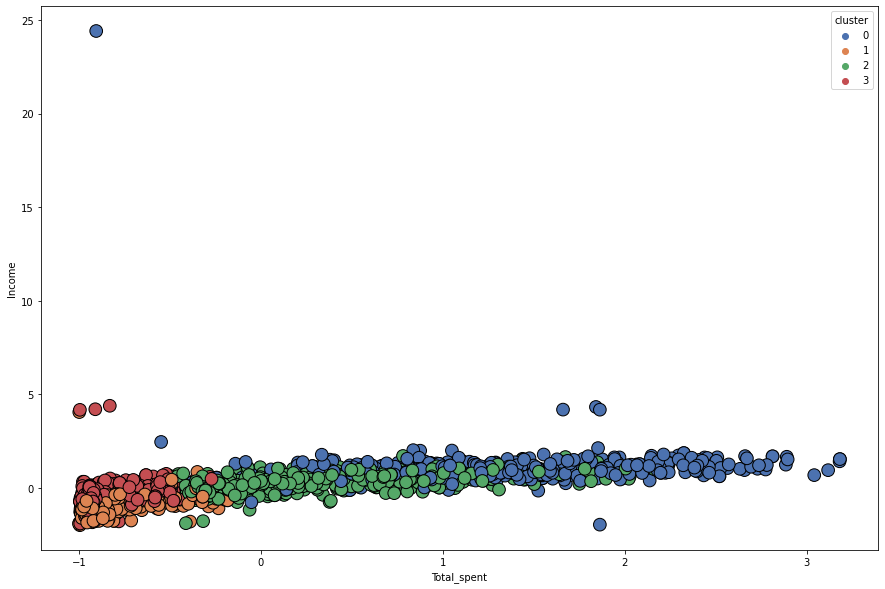

In [174]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data = df_3, 
    x='Total_spent', y='Income', hue='cluster', edgecolor='black', palette = 'deep', s=160,
    ax=ax)

### EVALUATION - Menghitung sillhouette score melihat bagaimana performa model yang didapat

In [175]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

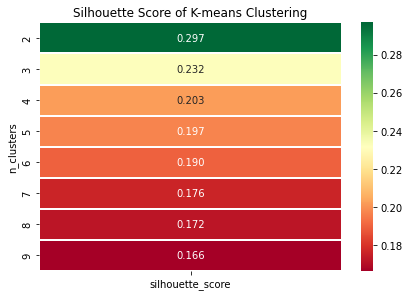

In [176]:
visualize_silhouette_layer(df_3)

Untuk menemukan K-Cluster yang optimal, kita dapat memanfaatkan Skor Siluet di setiap cluster dan setiap titik.  Skor ini mewakili seberapa baik data telah dikelompokkan, dan skor di atas 0 semakin baik, sedangkan nilai negatif berarti algoritma K-means kita telah menempatkan titik data itu di cluster yang salah. Score pada proses clustering ini sudah cukup baik pada jumlah cluster 2,3, dan 4. Jadi, jumlah cluster 3-4 masih cukup baik dalam pemodelan ini.

## Interpretasi

Pada case clusterifikasi customer ini,  Kita fokus pada fitur `Total_spent` dan `Income`. Sehingga, kita perlu mengagregasi terlebih dahulu Total_spent dan Income tiap cluster untuk mendapatkan informasi statistik dari tiap cluster. 

In [177]:
df_based_cluster = df_1.groupby(['cluster']).agg({'Total_spent': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['count', 'mean', 'median', 'min', 'max'],
                                                'Conversion_rate':['count', 'mean', 'median', 'min', 'max']
                                                 }).reset_index()
df_based_cluster

cluster Total_spent                                           Income  \
                count          mean     median     min      max  count   
0       0         525  1.404608e+06  1379000.0   62000  2525000    525   
1       1         600  1.059250e+05    63500.0    5000   497000    600   
2       2         579  8.278808e+05   770000.0  322000  1910000    579   
3       3         512  1.268789e+05    86500.0    8000   444000    512   

                                                    Conversion_rate  \
           mean      median        min          max           count   
0  7.814110e+07  77226000.0  2447000.0  666666000.0             525   
1  3.013269e+07  29805000.0  1730000.0  153924000.0             600   
2  6.003768e+07  60474000.0  4428000.0   94871000.0             579   
3  4.280156e+07  42451000.0  4023000.0  162397000.0             512   

                                   
        mean    median  min   max  
0  10.511699  8.666667  0.0  43.0  
1   1.279244  1.000000  0.0   7.5  
2   4.436638  4.000000  0.0  25.0  
3   1.708810  1.500000  0.0  12.0

Berdasarkan rata-rata Total_spent, dapat disimpulkan bahwa :      
- 0 ---> Customer yang sangat konsumtif atau high spending
- 1 ---> Customer yang tidak konsumtif/ customer with low expenses
- 2 ---> Customer yang konsumtif /customers with medium expenses
- 3 ---> Customer yang tidak konsumtif/ customer with low expenses

Berdasarkan rata-rata Income, dapat disimpulkan bahwa :       
- 0 ---> Customer dengan pendapatan yang tinggi/ customer with high income
- 1 ---> Customer with low to medium income
- 2 ---> Customer with medium income
- 3 ---> Customer with low to medium income

Jika cluster dilihat dari dua fitur `Total_spent` dan `Income`, maka dapat disimpulkan :      
- 0 --> Consumerist customer with high income and high spending = `HIGH SPENDER`
- 1 --> Non-consumerist Customer with low to medium class income and low expenses = `RISK OF CHURN`
- 2 -->  Consumerist customer with medium income and medium expenses = `MIDDLE SPENDER`
- 3 --> Non-consumerist Customer with low to medium class income and low expenses = `LOW SPENDER`

In [180]:
map_cluster = {
    0 : 'High Spender',
    1 : 'Risk of Churn',
    2 : 'Middle Spender',
    3 : 'Low Spender'
}

df_1['Keterangan_Cluster'] = df_1['cluster'].map(map_cluster)

In [181]:
df_1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Age,Total_children,Age_when_firs_joining,segment_umur,Total_spent,Total_accepted_campaign,Total_transactions,Conversion_rate,cluster,Keterangan_Cluster
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,...,65,0,55,Middle Age and Mature,1617000,0,25,3.571429,0,High Spender
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,68,2,60,Middle Age and Mature,27000,0,6,1.200000,3,Low Spender
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,57,0,48,Middle Age and Mature,776000,0,21,5.250000,2,Middle Spender
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,...,38,1,30,Adult,53000,0,8,1.333333,1,Risk of Churn
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,41,1,33,Adult,422000,0,19,3.800000,2,Middle Spender


## VISUALISASI ANALISIS DARI EDA MENGGUNAKAN HASIL CLUSTER

### 1. Jumlah Customer tiap Cluster

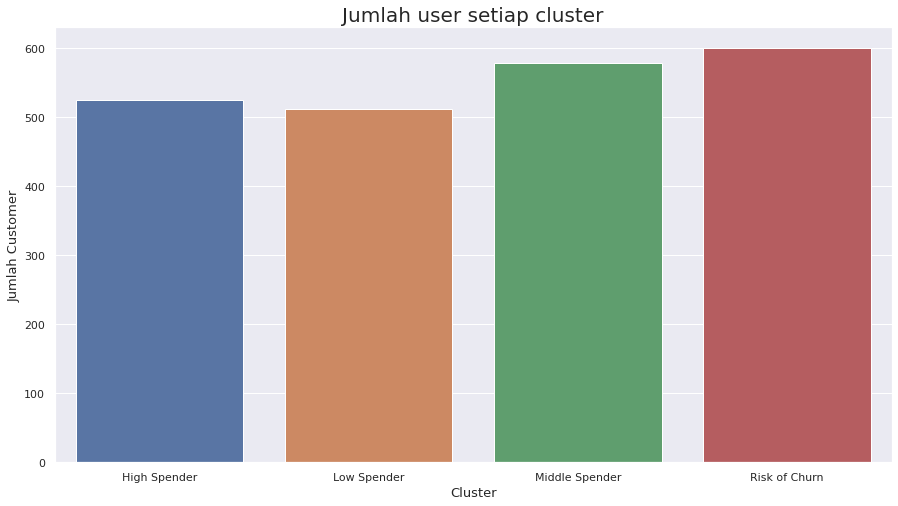

In [193]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df_1['Keterangan_Cluster'])
plt.title('Jumlah user setiap cluster', size = 20)
plt.ylabel('Jumlah Customer', size = 13)
plt.xlabel('Cluster', size = 13)
plt.show()

Customer yang beresiko untuk churn adalah cluster yang paling banyak dibandingkan cluster lainnya. Dengan demikian, target marketing campaign prioritas kita adalah cluster 'Risk of Churn' karena kita harus berusaha untuk memenangkan hati customer. Jika sudah terjadi churn, justru akan meningkatkan kerugian perusahaan  karena kita harus meningkatkan operasional cost hingga 5 kali untuk mengakuisisi customer yang baru yang dalam jangka panjang juga belum tentu loyal terhadap platform kita. Kita akan memprioritaskan promo-promo dan kupon serta cashback kita kepada kluster ini. Sedangkan customer yang dikluster sebagai high spender dan medium spender kita berikan penawaran pengumpulan koin dan meminimalisir jumlah kupon yang akan kita tawarkan. Poin dapat menjadi daya tarik customer untuk berbelanja. Sedangkan customer yang dikluster sebagai low spender, kita berikan kupon tertentu dengan syarat minimum berbelanja, cashback, maupun hadiah/gift ketika sudah melakukan transaksi dengan jumlah yang kita tentukan, dengan tujuan untuk meningkatkan perilaku konsumsi terhadap produk yang kita tawarkan dan meningkatkan jumlah transaksi pada platform kita. 

### 2. Income vs Conversion Rate tiap Cluster

Text(0.5, 1.0, 'Conversion Rate vs Income tiap Cluster')

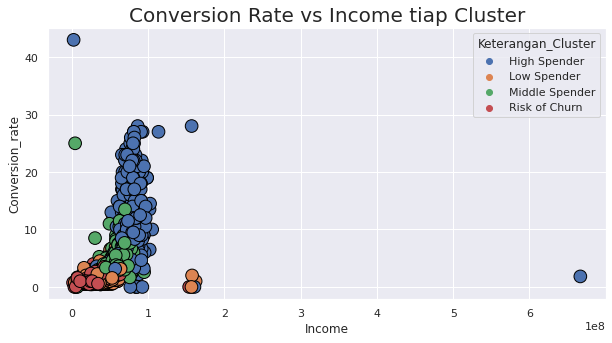

In [199]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df_1, 
    x='Income', y='Conversion_rate', hue='Keterangan_Cluster', edgecolor='black', palette = 'deep', s=160,
    ax=ax)
plt.title('Conversion Rate vs Income tiap Cluster', size = 20)

Customer dengan cluster High spender cenderung memiliki Income yang tinggi dan Conversion rate yang tinggi. Sedangkan customer yang risk of Churn cenderung memiliki income yang rendah dan conversion rate yang rendah pula. Ini artinya, Income memiliki korelasi terhadap conversion rate, korelasi positif. Rekomendasi yang dapat ditawarkan dari analisis ini adalah 'meningkatkan kualitas website, User interface dan memperbanyak variasi produk'. Dengan harapan, jika conversion rate tinggi, maka kemungkinan untuk terjadinya transaksi akan lebih memungkinkan. sehingga kegiatan tersebut dapat meningkatkan revenue perusahaan. 

### 3. Income vs Total Spent tiap Cluster

Text(0.5, 1.0, 'Total Spent vs Income')

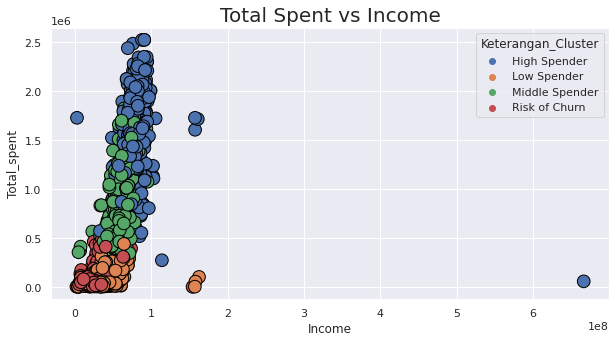

In [203]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df_1, 
    x='Income', y='Total_spent', hue='Keterangan_Cluster', edgecolor='black', palette = 'deep', s=160,
    ax=ax)
plt.title('Total Spent vs Income', size = 20)

Seperti yang sudah dibahas sebelumnya, Income dan Total_spent memiliki korelasi yang positif. Dan Clusterifikasi customer juga didasarkan oleh dua fitur ini. Kesimpulannya  :
- Total Spent tinggi dan Income tinggi --> Consumerist customer with high income and high spending = HIGH SPENDER
- Total Spent rendah dan Income rendah --> Non-consumerist Customer with low to medium class income and low expenses = RISK OF CHURN
- Total spent tinggi dan income tinggi (tapi tidak setinggi high spender) --> Consumerist customer with medium income and medium expenses = MIDDLE SPENDER
- Total spent dan Income lebih tinggi dibandingkan customer kluster Risk of Churn  --> Non-consumerist Customer with low to medium class income and low expenses = LOW SPENDER

### 4. Total Spent vs Conversion Rate

Text(0.5, 1.0, 'Total Spent vs Conversion Rate tiap Cluster')

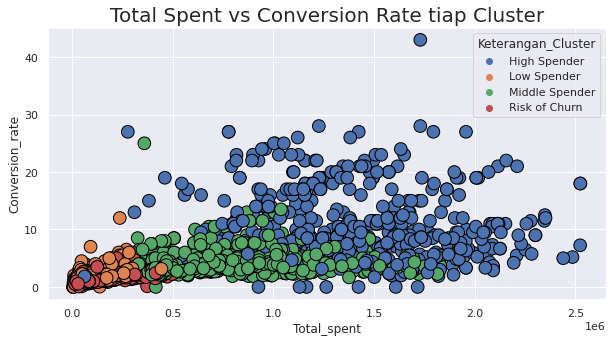

In [202]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df_1, 
    x='Total_spent', y='Conversion_rate', hue='Keterangan_Cluster', edgecolor='black', palette = 'deep', s=160,
    ax=ax)
plt.title('Total Spent vs Conversion Rate tiap Cluster', size = 20)

Total_spent memiliki korelasi dan kecendrungan yang positif terhadap conversion rate. Conversion rate tinggi, Total spent juga naik. Untuk meningkatkan total spent customer, kita perlu mempertimbangkan bagaimana cara untuk meningkatkan conversion rate, seperti meningkatkan kualitas website, UI, ataupun menambah variasi produk yang dijual di platform kita. Dengan demikian, diharapkan dapat meningkatkan total_spent dari customer. 

### 5. Total Children vs Conversion Rate

Text(0.5, 1.0, 'Total Children vs Conversion Rate tiap Cluster')

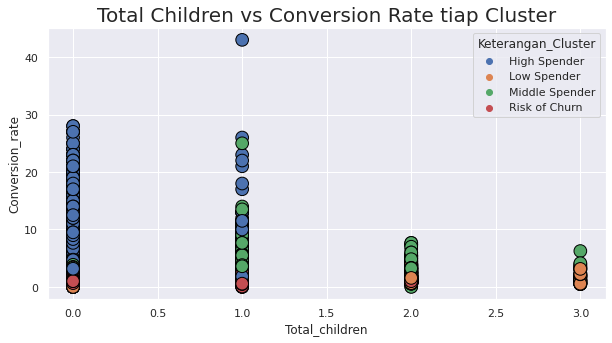

In [205]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = df_1, 
    x='Total_children', y='Conversion_rate', hue='Keterangan_Cluster', edgecolor='black', palette = 'deep', s=160,
    ax=ax)
plt.title('Total Children vs Conversion Rate tiap Cluster', size = 20)

Jumlah anak juga mempengaruhi conversion rate kunjungan pada web kita. semakin sedikit jumlah anak, conversion rate semakin tinggi dan mayoritas dari cluster `High Spender` adalah customer yang memiliki anak 0. Karena mayoritas pengunjung web adalah customer yang memiliki anak, maka direkomendasikan untuk menambah produk-produk perlengkapan anak atau bayi pada platform kita untuk meningkatkan kunjungan customer yang memiliki anak. Dengan demikian, jika kunjungan makin tinggi, maka diharapkan juga meningkatkan revenue terhadap perusahaan. 

KDE PLOT

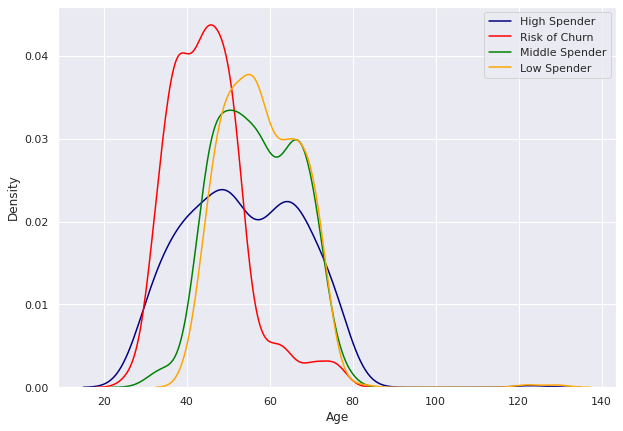

In [209]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(df_1[df_1['cluster']==0]['Age'].dropna(),color='navy',label='High Spender', ax=ax)
sns.kdeplot(df_1[df_1['cluster']==1]['Age'].dropna(),color='red',label='Risk of Churn', ax=ax)
sns.kdeplot(df_1[df_1['cluster']==2]['Age'].dropna(),color='green',label='Middle Spender', ax=ax)
sns.kdeplot(df_1[df_1['cluster']==3]['Age'].dropna(),color='orange',label='Low Spender', ax=ax)
plt.legend() ; 

Persebaran umur tidak terlalu berarti untuk menjelaskan conversion rate, maupun alasan kluster itu sendiri terbentuk. 